# Data Wrangling

The challenge is to predict the variable "sale" in order to know if a user will finish a purchase or not. For this example, we have several variables provides expressly for this job. These variables have been recoleted from the web  portal an represent the users's activity during a week time.

Import the libreries necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

Import the data from csv file original

In [2]:
df=pd.read_csv('./clicks.csv', sep=',')

The file clicks.csv contains data about clicks received from a hotel metasearch portal during the period of one week.
Some examples of hotel metasearch portals are hotelscan.com, kayak.com, trivago.com, etc.

## Examining the data

Checking the shape of dataframe

In [3]:
df.shape

(158161, 8)

We doing a sample of severals items

The dataset
The file includes the following fields:

    date - the date of the click
    remite_id - the geographical market of the portal (eg kayak.co.uk, kayak.fr, kayak.de, etc)
    checkin - the checkin date in the original user search
    checkout - the checkout date in the original user search
    adults - the number of adults in the original user search
    children - the number of children in the original user search
    hotel_id - the hotel clicked on by the user
    sale - whether or not the click eventually resulted in a hotel reservation in Destinia 

In [4]:
df.sample(10)

,date,remite_id,checkin,checkout,adults,children,hotel_id,sale
376,2016-04-01,89,2016-05-05,2016-05-08,1,0,224049,0
109665,2016-04-05,27,2016-04-24,2016-04-25,2,0,167003,0
41357,2016-04-02,27,2016-06-23,2016-06-26,2,1,206352,0
41931,2016-04-02,27,2016-04-24,2016-04-25,2,0,209999,0
19340,2016-04-01,27,2016-05-05,2016-05-08,2,2,150845,0
143684,2016-04-07,27,2016-04-15,2016-04-16,2,0,165545,1
36501,2016-04-02,27,2016-04-22,2016-04-24,2,1,4086,0
110746,2016-04-05,27,2016-07-16,2016-07-28,2,0,970,0
75541,2016-04-04,27,2016-07-16,2016-07-22,2,2,208862,0
111015,2016-04-05,27,2016-04-14,2016-04-19,3,0,88222,0


On the other hand, we need to know the data types of dataframe

In [5]:
df.dtypes

date         object
remite_id     int64
checkin      object
checkout     object
adults        int64
children      int64
hotel_id      int64
sale          int64
dtype: object

We check if there are any columns with NA values

In [6]:
df.isnull().any()

date         False
remite_id    False
checkin      False
checkout     False
adults       False
children     False
hotel_id     False
sale         False
dtype: bool

We have a quick look at the correlation between the numerical variables

In [7]:
df.corr()

,remite_id,adults,children,hotel_id,sale
remite_id,1.000000,-0.024550,-0.076523,0.197345,-0.022676
adults,-0.024550,1.000000,0.001900,0.033156,-0.025089
children,-0.076523,0.001900,1.000000,0.027788,-0.012033
hotel_id,0.197345,0.033156,0.027788,1.000000,-0.010107
sale,-0.022676,-0.025089,-0.012033,-0.010107,1.000000


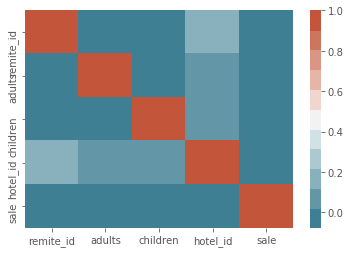

In [8]:
import seaborn as sns

sns.heatmap(df.corr(), cmap=sns.diverging_palette(220,20,n=11))

## Formatting columns and parsing dates and times

We need to convert the columns 'object' to datatime in order to manipulate the data

First we convert the column 'date'

In [9]:
df['date']=pd.to_datetime(df['date'])

We convert finally the columns 'checkin' and 'checkout'

In [10]:
cols_2_extract = df.columns[2:4]
df[cols_2_extract] = df[cols_2_extract].applymap(lambda x : pd.to_datetime(x))

Checking the result of convertion

In [11]:
df.dtypes

date         datetime64[ns]
remite_id             int64
checkin      datetime64[ns]
checkout     datetime64[ns]
adults                int64
children              int64
hotel_id              int64
sale                  int64
dtype: object

In [12]:
df.head()

,date,remite_id,checkin,checkout,adults,children,hotel_id,sale
0,2016-04-01,89,2016-04-18,2016-04-26,2,0,255858,0
1,2016-04-01,89,2016-05-27,2016-05-28,2,2,80563,0
2,2016-04-01,89,2016-06-18,2016-06-19,2,0,165762,0
3,2016-04-01,89,2016-06-18,2016-06-19,2,0,165762,0
4,2016-04-01,89,2016-07-13,2016-08-20,2,0,849,0


We observe the stadistical parameters of 'sale' field, target of the dataframe for future predictions

In [13]:
df['sale'].describe()

count    158161.000000
mean          0.019543
std           0.138425
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: sale, dtype: float64

We generate fields with the day of the week and if the value correspondig to weekend or not

In [14]:
from datetime import datetime

def dow(date):
    days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    dayNumber=date.weekday()
    return days[dayNumber]

#If the values return is 1, is weekend
def weekend (x):
    if x > 4:return 1
    else: return 0

In [15]:
df['dayweek_num_click'] = df['date'].apply(lambda x: x.weekday())
df['weekday_click'] = df['date'].apply(lambda x: dow(x))

The monday is the '0' value and the Sunday the '6' value

In [16]:
df ['weekend'] = df['dayweek_num_click'].apply(lambda x: weekend(x))

In [17]:
df.sample(10)

,date,remite_id,checkin,checkout,adults,children,hotel_id,sale,dayweek_num_click,weekday_click,weekend
831,2016-04-01,89,2016-11-28,2016-12-08,2,0,266121,0,4,Friday,0
154365,2016-04-07,27,2016-04-14,2016-04-15,2,0,191568,0,3,Thursday,0
29055,2016-04-02,27,2016-04-30,2016-05-01,2,0,168165,0,5,Saturday,1
46005,2016-04-03,27,2016-04-22,2016-04-24,2,0,4100,0,6,Sunday,1
60347,2016-04-03,27,2016-08-22,2016-08-28,1,0,159203,0,6,Sunday,1
83619,2016-04-04,27,2016-04-09,2016-04-10,2,0,189214,0,0,Monday,0
130426,2016-04-06,27,2016-04-29,2016-05-02,2,0,376770,0,2,Wednesday,0
30198,2016-04-02,27,2016-08-16,2016-08-21,2,0,193868,0,5,Saturday,1
98424,2016-04-05,27,2016-07-30,2016-08-13,2,1,189761,0,1,Tuesday,0
65930,2016-04-03,89,2016-04-09,2016-04-16,2,0,63907,0,6,Sunday,1


Also, we create a field with the month of the checkin

In [18]:
df['month_of_checkin']= df['checkin'].apply(lambda x: x.month)

The number of days from the date of the 'click' and the checkin, also will be necessary

In [19]:
df['lag_days']= (df['checkin']- df['date'])/ pd.Timedelta(1, unit='d')

The number of days of the  hotel stay, is important

In [20]:
df['ndays_reserve']= (df['checkout']- df['checkin'])/pd.Timedelta(1, unit='d')

In [21]:
df.sample(5)

,date,remite_id,checkin,checkout,adults,children,hotel_id,sale,dayweek_num_click,weekday_click,weekend,month_of_checkin,lag_days,ndays_reserve
119295,2016-04-06,89,2016-10-15,2016-10-22,2,0,4831,0,2,Wednesday,0,10,192.0,7.0
138591,2016-04-07,89,2016-08-23,2016-08-30,2,1,1021,0,3,Thursday,0,8,138.0,7.0
62973,2016-04-03,130,2016-08-19,2016-08-30,2,2,1074,0,6,Sunday,1,8,138.0,11.0
67064,2016-04-04,89,2016-05-02,2016-05-03,2,0,148438,0,0,Monday,0,5,28.0,1.0
60216,2016-04-03,27,2016-04-23,2016-04-25,2,0,93009,0,6,Sunday,1,4,20.0,2.0


In [22]:
df.dtypes

date                 datetime64[ns]
remite_id                     int64
checkin              datetime64[ns]
checkout             datetime64[ns]
adults                        int64
children                      int64
hotel_id                      int64
sale                          int64
dayweek_num_click             int64
weekday_click                object
weekend                       int64
month_of_checkin              int64
lag_days                    float64
ndays_reserve               float64
dtype: object

## Plotting the data

Plotting the size of variable 'sale', we seeing that the values are vey unbalanced

In [23]:
df.groupby('sale').size()

sale
0    155070
1      3091
dtype: int64

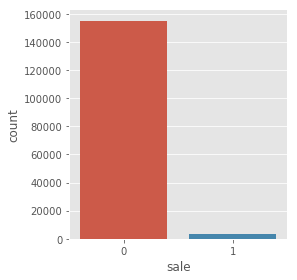

In [24]:
sns.factorplot('sale',data=df,kind="count")

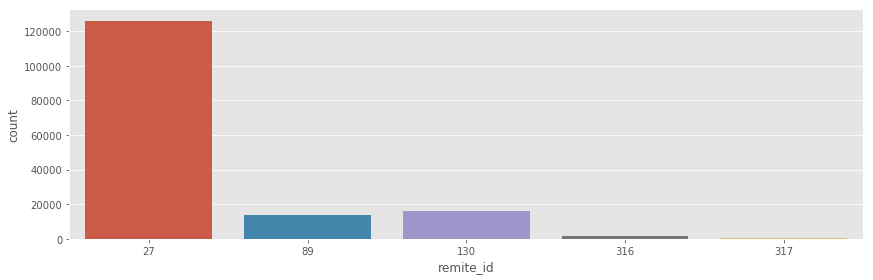

In [25]:
sns.factorplot('remite_id',data=df,kind="count", aspect=3)

We see below the 'hotel_id' variable contains values unique into a range huge big. As we don't have hotel's indicators about the quality, price, opinions, etc.., we will not treat this variable

In [26]:
df['hotel_id'].nunique()

9662

Ploting the variables 'adults'& 'children'to see their distribution

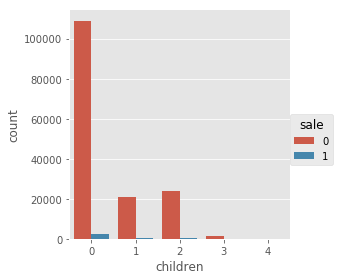

In [27]:
sns.factorplot('children',data=df,hue='sale',kind="count")

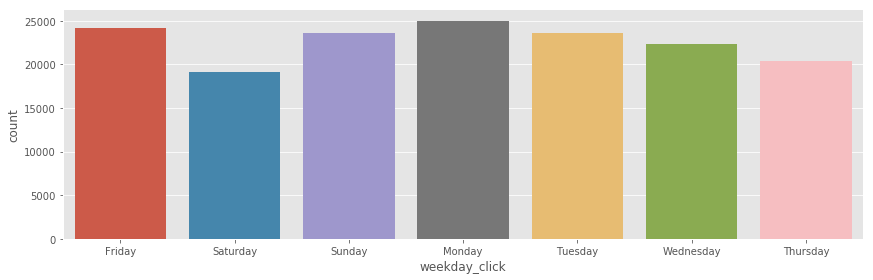

In [28]:
sns.factorplot('weekday_click',data=df,kind="count", aspect=3)

Plotting the data with the columns obtains, we will see if there are relations between the day of the week and the days pass by the click and checkin.

In [29]:
weekday=df['weekday_click']
lag_days = df['lag_days']

As we can see in the plot below the Sunday is the day when the lag is more big (Lag is the time between the search and the checkin)

(0, 140)

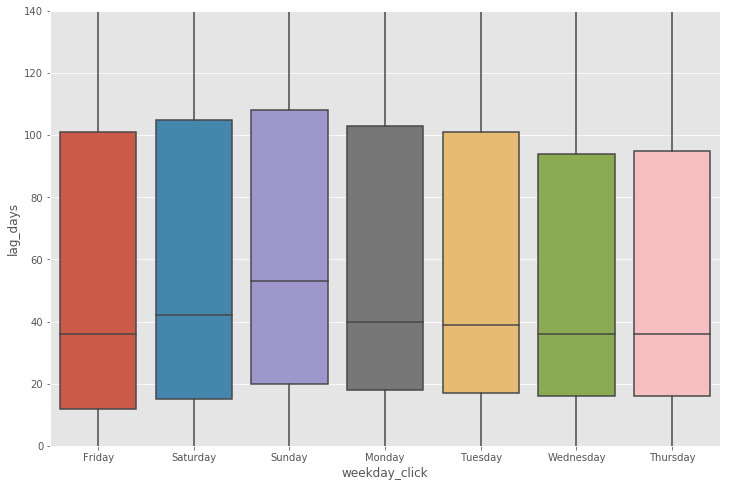

In [30]:
f = plt.figure()
f.set_size_inches(12,8)
ax = sns.boxplot(x=weekday, y=lag_days)
ax.set_ylim(-0,140)

We are going to see the sales per hotel_id, we see the top 10 hotels with more sales in this week and their medias values

In [31]:
sales_per_hotel = df.groupby('hotel_id')['sale'].agg(['mean', 'count'])
sales_per_hotel.sort_values(by='count', ascending=False).head(10)

,mean,count
hotel_id,,
150845,0.029903,1438
1869,0.012869,1321
162483,0.019721,1217
191568,0.014925,1139
336,0.024390,984
150476,0.017391,920
185272,0.016797,893
206352,0.008464,827
118,0.012315,812


Plotting the data

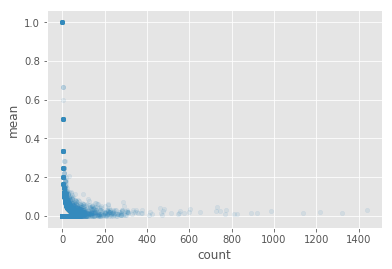

In [32]:
#plt.scatter(sales_per_hotel['count'], sales_per_hotel['mean'])
sales_per_hotel.plot.scatter('count','mean', alpha=.1)

Plotting the sales by date, we seeing that the number is differente according to de day of the week

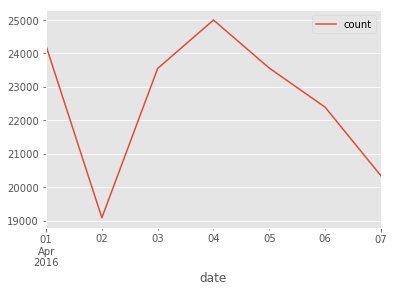

In [33]:
df.groupby('date')['sale'].agg(['count']).plot()

### Relationships

We observed that there are some outlayers in the field 'ndays_reserve' for the sale with value as 0, and the most part of the sales positives are included below 20 days of stay

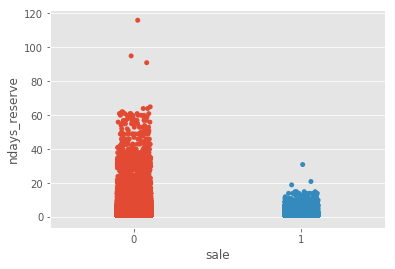

In [34]:
sns.stripplot(data=df, x='sale',y='ndays_reserve', jitter=True);

Visualizing several variables with a pairplot graphics with seaborn, we use the kind regression.

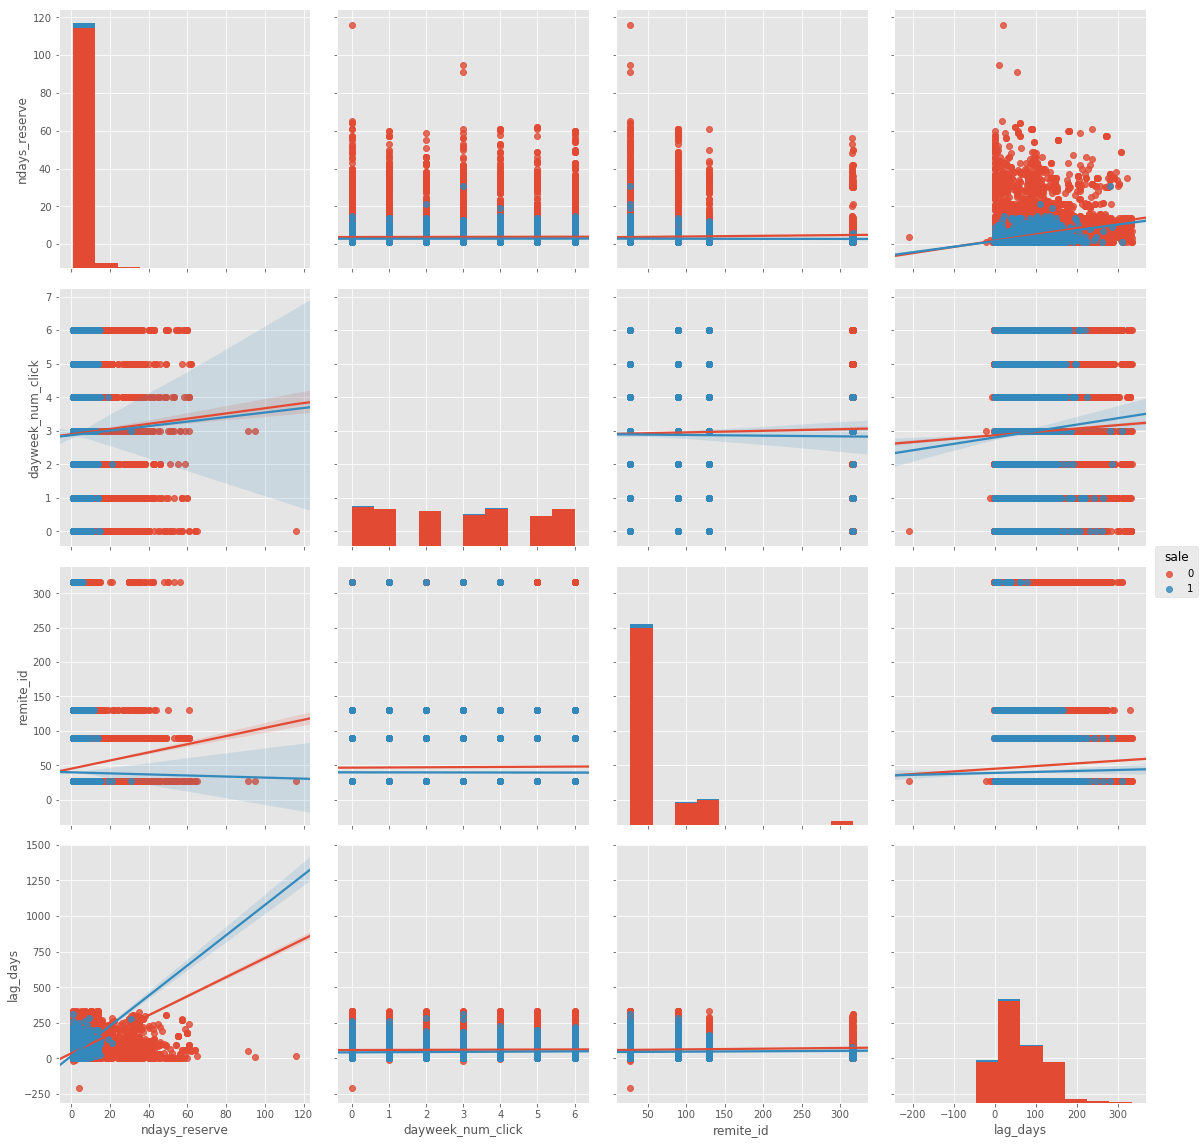

In [35]:
sns.pairplot(df.dropna(), hue='sale',size=4,vars=["ndays_reserve", "dayweek_num_click","remite_id","lag_days"],kind='reg')

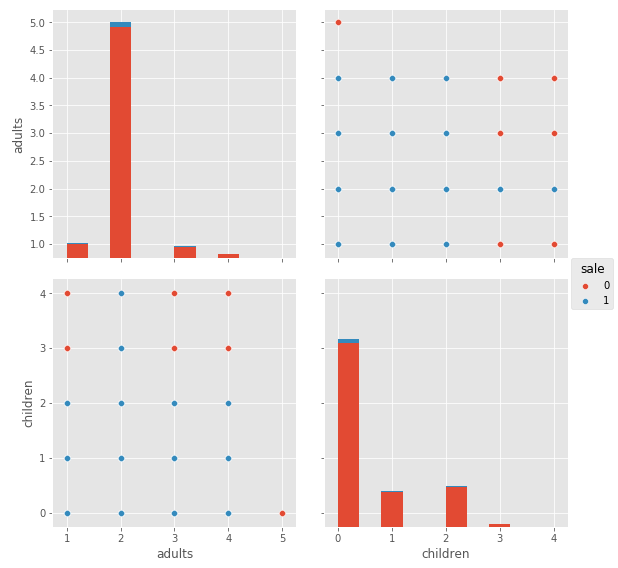

In [36]:
sns.pairplot(df.dropna(), hue='sale',size=4,vars=["adults","children"],kind='scatter')

#### Pre-Processing: Encoding Variables

We have seem that it's neccesary encoding the field remite_id, so we'll asign a digit in function on their weights values

In [37]:
df.loc[ df['remite_id'] == 317, 'remite_id_Encoded'] = 'Market1'
df.loc[ df['remite_id'] == 316, 'remite_id_Encoded'] = 'Market2'
df.loc[ df['remite_id'] == 89, 'remite_id_Encoded'] = 'Market3'
df.loc[ df['remite_id'] == 130, 'remite_id_Encoded'] = 'Market4'
df.loc[ df['remite_id'] == 27, 'remite_id_Encoded'] = 'Market5'

I going to encoding the unique variable 'object' type with the method One Hot Encoder. This method is a good alternative because One hot encoding creates new (binary) columns, indicating the presence of each possible value from the original data

In [38]:
df_encoded= pd.get_dummies(df, columns=["weekday_click"], prefix=["Click_"])
df_encoded= pd.get_dummies(df_encoded, columns=["remite_id_Encoded"], prefix=["Geo_"])

In [39]:
df_encoded.sample(10)

,date,remite_id,checkin,checkout,adults,children,hotel_id,sale,dayweek_num_click,weekend,...,Click__Saturday,Click__Sunday,Click__Thursday,Click__Tuesday,Click__Wednesday,Geo__Market1,Geo__Market2,Geo__Market3,Geo__Market4,Geo__Market5
46918,2016-04-03,27,2016-08-21,2016-08-28,2,2,336,0,6,1,...,0,1,0,0,0,0,0,0,0,1
127437,2016-04-06,27,2016-04-07,2016-04-08,2,0,205625,0,2,0,...,0,0,0,0,1,0,0,0,0,1
86173,2016-04-04,27,2016-04-15,2016-04-17,2,0,167862,0,0,0,...,0,0,0,0,0,0,0,0,0,1
394,2016-04-01,89,2016-04-22,2016-04-26,2,0,201747,0,4,0,...,0,0,0,0,0,0,0,1,0,0
72648,2016-04-04,27,2016-04-08,2016-04-10,2,0,488,0,0,0,...,0,0,0,0,0,0,0,0,0,1
71004,2016-04-04,27,2016-06-18,2016-06-25,2,0,151611,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76842,2016-04-04,27,2016-07-02,2016-07-10,2,2,192146,0,0,0,...,0,0,0,0,0,0,0,0,0,1
128166,2016-04-06,27,2016-07-10,2016-07-16,1,2,4214,0,2,0,...,0,0,0,0,1,0,0,0,0,1
91467,2016-04-04,317,2016-05-12,2016-05-23,2,0,355983,0,0,0,...,0,0,0,0,0,1,0,0,0,0
85644,2016-04-04,27,2016-04-24,2016-04-25,2,0,150452,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
df_encoded.dtypes

date                 datetime64[ns]
remite_id                     int64
checkin              datetime64[ns]
checkout             datetime64[ns]
adults                        int64
children                      int64
hotel_id                      int64
sale                          int64
dayweek_num_click             int64
weekend                       int64
month_of_checkin              int64
lag_days                    float64
ndays_reserve               float64
Click__Friday                 uint8
Click__Monday                 uint8
Click__Saturday               uint8
Click__Sunday                 uint8
Click__Thursday               uint8
Click__Tuesday                uint8
Click__Wednesday              uint8
Geo__Market1                  uint8
Geo__Market2                  uint8
Geo__Market3                  uint8
Geo__Market4                  uint8
Geo__Market5                  uint8
dtype: object

In [41]:
#Deleting the columns not necessary.
drop_elements = ['hotel_id','remite_id','date','checkin','checkout','month_of_checkin','dayweek_num_click']
df_encoded.drop(drop_elements, axis=1, inplace=True)

Note: Finally I don't use the variable 'month_of_checkin' but I consider that is a important variable, it can be use for future models.

In [42]:
df_encoded.sample(10)

,adults,children,sale,weekend,lag_days,ndays_reserve,Click__Friday,Click__Monday,Click__Saturday,Click__Sunday,Click__Thursday,Click__Tuesday,Click__Wednesday,Geo__Market1,Geo__Market2,Geo__Market3,Geo__Market4,Geo__Market5
450,2,0,0,0,162.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0
110171,2,0,0,0,106.0,5.0,0,0,0,0,0,1,0,0,0,0,0,1
31100,2,0,0,1,152.0,5.0,0,0,1,0,0,0,0,0,0,0,0,1
137740,2,0,0,0,8.0,1.0,0,0,0,0,0,0,1,0,0,0,0,1
95050,2,0,1,0,14.0,1.0,0,0,0,0,0,1,0,0,0,1,0,0
39981,2,0,0,1,29.0,2.0,0,0,1,0,0,0,0,0,0,0,0,1
82066,2,0,0,0,26.0,1.0,0,1,0,0,0,0,0,0,0,0,0,1
125459,2,0,0,0,9.0,2.0,0,0,0,0,0,0,1,0,0,0,0,1
63938,2,0,0,1,135.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0
51305,2,0,0,1,102.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1


Saving a new csv for use next notebooks and build the model

In [43]:
df_encoded.to_csv('./clicks_model.csv', sep=',')